### Cargo los datos: 

Ya están unificados y obtenido una variable para el caso de 'goodbad'

- unificado: significa que en los datos originales había variables con {1,2} dónde 1 significaba 'sí' y 2 'no' y otras con {0,1} donde el 0 es 'no' y el 1 'sí'. Ahora está codificado todo con {0,1} dónde el 0 significa 'no' y el 1 'sí'
- 'goodbad': esta variable categoriza cada instancia en si ha sido buena o mala en función de los días de estancia que haya pasado ingresado el paciente después de la operación. Si es <8 es buena (1) si es mayor o igual es mala (0)
- tipo/tipoNum: estas variables significan si ha habido reconstrucción 3D para la operación {con, 1} o si  no la ha habido {sin, 0}

In [1]:
import pandas as pd
df = pd.read_csv('rawdata_unificado_goodbad.csv', sep=';', encoding='latin-1')

In [2]:
df.shape

(117, 37)

In [3]:
df=df.drop(columns=["NH"])

Mezclar los datos para que no estén los de 'con' reconstrucción todos seguidos y luego los de 'sin'

In [4]:
from sklearn.utils import shuffle
dfShuffle = shuffle(df,random_state=1)

Separar los datos que son susceptibles de ser predecibles, de los demás

In [5]:
dfY = pd.DataFrame()
dfY=dfShuffle[["Tipo","TipoNum","Dias de estancia","EXITUS","goodbad"]].copy()
dfX=dfShuffle.drop(columns=["Tipo","TipoNum","Dias de estancia","EXITUS","goodbad"])
dfX

,EDAD,SEXO,diabetes U,TABAQUISMO,ASA,vasculopatía U,imc U,LEUCOCITOS,hemoglobina U,creatinina U,...,trasfusion U,adyuvancia U,TIPO HISTOLOGICO,GRADO HISTOLOGICO,N_GANGLIOS RES,EXTENSION (T),ilv U,ipn U,budding U,AJCC
69,63,2,0,2,2,0,0,2,1,0,...,0,0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0
46,82,1,0,3,3,1,0,2,1,0,...,0,0,1.0,2.0,2.0,3.0,0.0,1.0,NaN,5.0
58,31,1,0,1,2,0,0,2,1,0,...,0,1,2.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0
114,86,2,0,1,2,0,0,2,1,0,...,0,0,1.0,2.0,2.0,3.0,0.0,0.0,NaN,5.0
73,67,1,1,2,2,1,0,2,0,0,...,0,0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,59,2,0,1,2,0,0,1,1,0,...,0,0,1.0,2.0,2.0,3.0,0.0,0.0,0.0,2.0
72,66,1,0,2,3,1,1,2,1,0,...,0,1,2.0,2.0,2.0,3.0,1.0,1.0,0.0,5.0
12,64,1,0,3,1,0,0,2,0,0,...,0,1,1.0,1.0,2.0,3.0,0.0,1.0,0.0,2.0
107,82,1,0,2,3,1,1,2,1,0,...,0,0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,1.0


In [6]:
dfX.columns

Index(['EDAD', 'SEXO', 'diabetes U', 'TABAQUISMO', 'ASA', 'vasculopatía U',
       'imc U', 'LEUCOCITOS', 'hemoglobina U', 'creatinina U', 'albumina U',
       'cea U', 'neoadyuvancia U', 'LOCALIZACION', 'CIRUGIA', 'TiempoCx',
       'Nº trocar', 'conversion U', 'complicaciones intraop U',
       'descenso ang U', 'complicaciones U', 'trasfusion U', 'adyuvancia U',
       'TIPO HISTOLOGICO', 'GRADO HISTOLOGICO', 'N_GANGLIOS RES',
       'EXTENSION (T)', 'ilv U', 'ipn U', 'budding U', 'AJCC'],
      dtype='object')

Normalización de los datos de tipo continuo

In [7]:
from sklearn import preprocessing
dfX_norm = dfX.copy()
scaler = preprocessing.MinMaxScaler() #normalize the age
dfX_norm[['EDAD','Nº trocar','TiempoCx']] = scaler.fit_transform(dfX_norm[['EDAD','Nº trocar','TiempoCx']])

Conocer que columnas tienen NaN

In [8]:
for i in range(31):
    col = dfX_norm.columns[i]
    count = dfX_norm[col].isna().sum()
    print(dfX_norm[col].name,count)

EDAD 0
SEXO 0
diabetes U 0
TABAQUISMO 0
ASA 0
vasculopatía U 0
imc U 0
LEUCOCITOS 0
hemoglobina U 0
creatinina U 0
albumina U 25
cea U 12
neoadyuvancia U 0
LOCALIZACION 0
CIRUGIA 0
TiempoCx 0
Nº trocar 0
conversion U 0
complicaciones intraop U 0
descenso ang U 0
complicaciones U 0
trasfusion U 0
adyuvancia U 0
TIPO HISTOLOGICO 3
GRADO HISTOLOGICO 10
N_GANGLIOS RES 3
EXTENSION (T) 5
ilv U 5
ipn U 5
budding U 18
AJCC 5


### 1. Probamos con todas las variables

Eliminamos las columnas con NaN ya que si no, no se puede aplicar kprototypes. Quitamos 'albumina U' y 'cea U' (que son del pre-operatorio) y quitamos todas las de anatomía patológica ('TIPO HISTOLOGICO','GRADO HISTOLOGICO', 'N_GANGLIOS RES', 'EXTENSION (T)', 'ilv U','ipn U', 'budding U', 'AJCC')

In [9]:
dfX_norm=dfX_norm.drop(columns=["albumina U","cea U","TIPO HISTOLOGICO","GRADO HISTOLOGICO","N_GANGLIOS RES","EXTENSION (T)","ilv U","ipn U","budding U","AJCC"])

In [10]:
name_col=dfX_norm.columns

Partir los datos en conjunto de entrenamiento y conjunto de test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX_norm, dfY, test_size=0.10, random_state=42)

In [12]:
print(len(X_train))
print(len(X_test))

105
12


In [13]:
y_train_gb= pd.DataFrame()
y_train_gb=y_train[["goodbad"]].copy()
y_test_gb= pd.DataFrame()
y_test_gb=y_test[["goodbad"]].copy()

In [14]:
ind = X_train.index #extraer el orden de los índices

### 1.1 Clustering

In [15]:
from kmodes.kprototypes import KPrototypes
kproto = KPrototypes(n_clusters=2, init='Cao')
clusters = kproto.fit_predict(X_train, categorical=[1,2,3,4,5,6,7,8,9,10,11,12,15,16,17,18,19,20])

Unir los datos de las etiquetas de los clusteres con el dataset completo

In [16]:
labels = pd.DataFrame(clusters, index=ind)
training_set=pd.concat((X_train,y_train),axis=1)
training_set

,EDAD,SEXO,diabetes U,TABAQUISMO,ASA,vasculopatía U,imc U,LEUCOCITOS,hemoglobina U,creatinina U,...,complicaciones intraop U,descenso ang U,complicaciones U,trasfusion U,adyuvancia U,Tipo,TipoNum,Dias de estancia,EXITUS,goodbad
29,0.666667,2,0,2,3,1,1,2,0,0,...,1,0,1,0,0,con,1,9,0.0,0
71,0.555556,2,0,1,1,0,0,2,0,0,...,0,0,1,0,1,sin,0,15,0.0,0
66,0.444444,2,0,1,2,0,0,2,1,0,...,0,0,0,0,0,sin,0,8,0.0,0
69,0.507937,2,0,2,2,0,0,2,1,0,...,0,0,0,0,0,sin,0,6,0.0,1
115,0.873016,2,0,1,2,0,0,2,1,0,...,0,0,1,0,0,sin,0,9,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.222222,2,0,1,1,0,0,2,0,0,...,0,0,1,0,1,con,1,7,0.0,1
110,0.841270,1,1,1,3,1,0,2,1,1,...,0,0,0,0,1,sin,0,5,0.0,1
68,0.476190,1,1,2,3,1,1,2,0,0,...,1,0,0,0,1,sin,0,15,0.0,0
23,0.634921,2,0,1,2,0,0,2,0,0,...,0,1,0,0,1,con,1,6,0.0,1


In [17]:
labeled_training = pd.concat([training_set,labels],axis=1)
labeled_training = labeled_training.rename({0:'labels'},axis=1)
labeled_training

,EDAD,SEXO,diabetes U,TABAQUISMO,ASA,vasculopatía U,imc U,LEUCOCITOS,hemoglobina U,creatinina U,...,descenso ang U,complicaciones U,trasfusion U,adyuvancia U,Tipo,TipoNum,Dias de estancia,EXITUS,goodbad,labels
29,0.666667,2,0,2,3,1,1,2,0,0,...,0,1,0,0,con,1,9,0.0,0,1
71,0.555556,2,0,1,1,0,0,2,0,0,...,0,1,0,1,sin,0,15,0.0,0,0
66,0.444444,2,0,1,2,0,0,2,1,0,...,0,0,0,0,sin,0,8,0.0,0,0
69,0.507937,2,0,2,2,0,0,2,1,0,...,0,0,0,0,sin,0,6,0.0,1,0
115,0.873016,2,0,1,2,0,0,2,1,0,...,0,1,0,0,sin,0,9,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,0.222222,2,0,1,1,0,0,2,0,0,...,0,1,0,1,con,1,7,0.0,1,0
110,0.841270,1,1,1,3,1,0,2,1,1,...,0,0,0,1,sin,0,5,0.0,1,0
68,0.476190,1,1,2,3,1,1,2,0,0,...,0,0,0,1,sin,0,15,0.0,0,1
23,0.634921,2,0,1,2,0,0,2,0,0,...,1,0,0,1,con,1,6,0.0,1,0


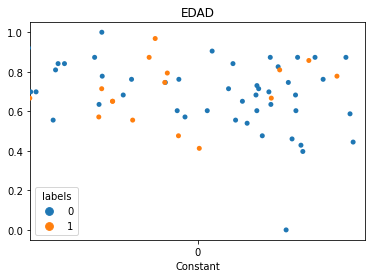

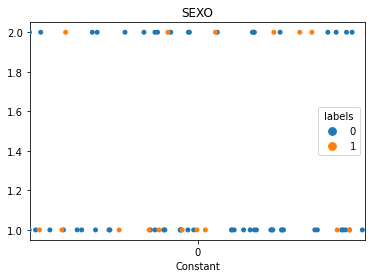

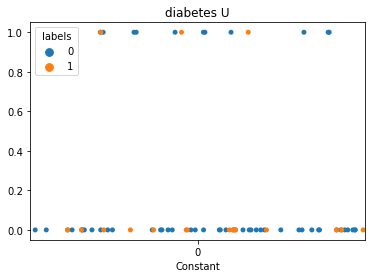

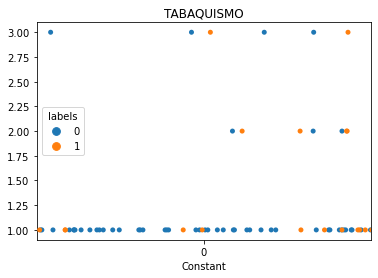

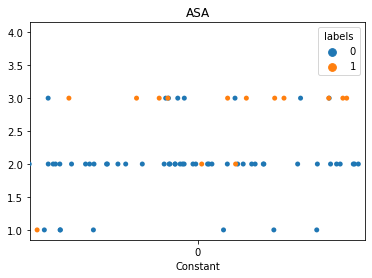

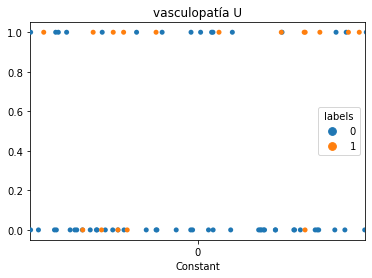

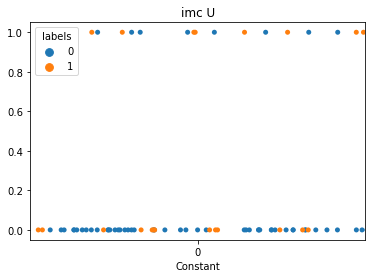

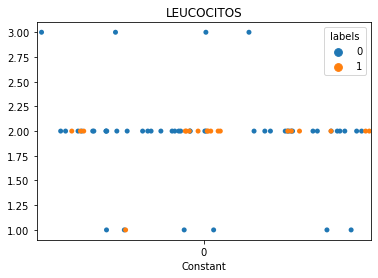

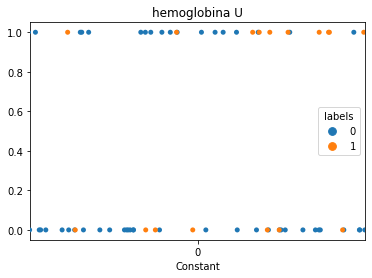

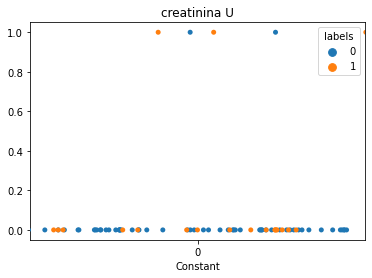

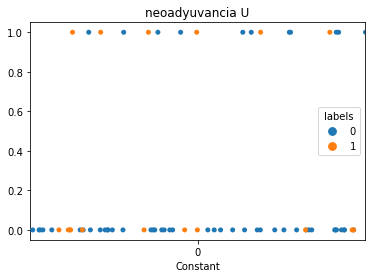

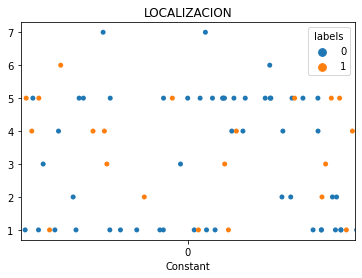

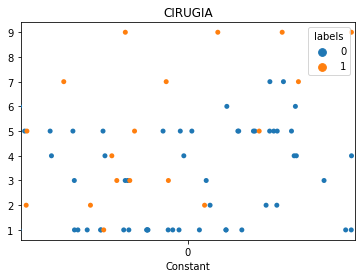

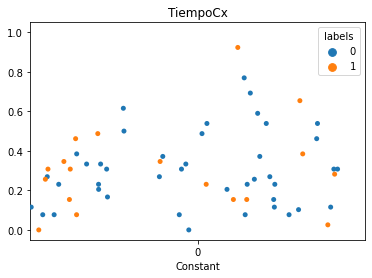

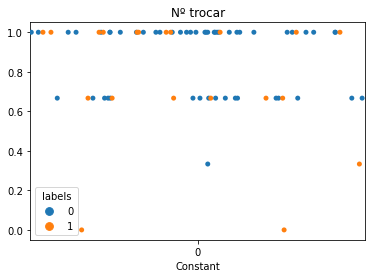

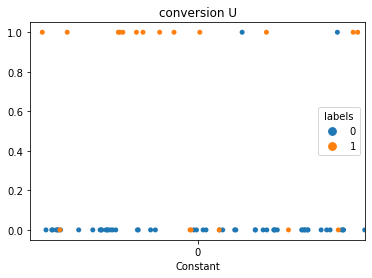

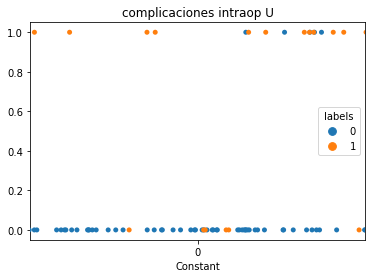

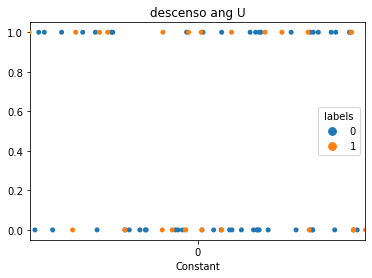

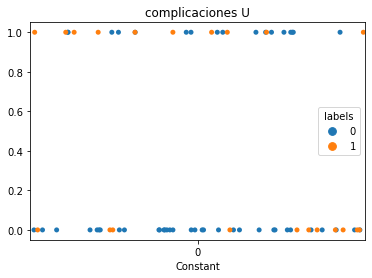

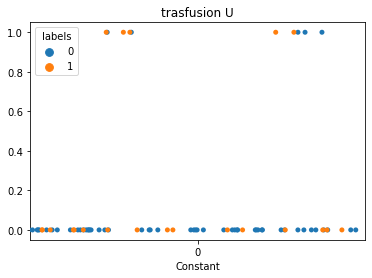

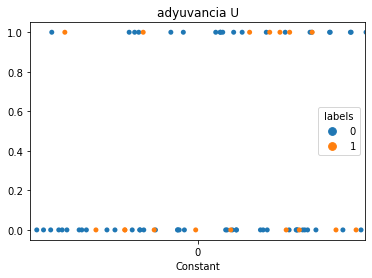

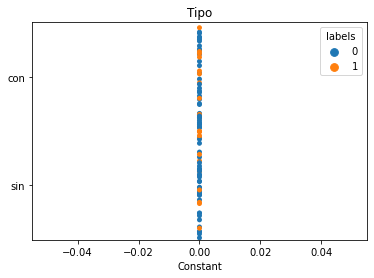

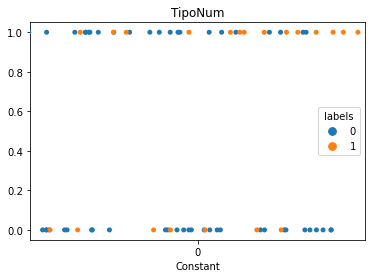

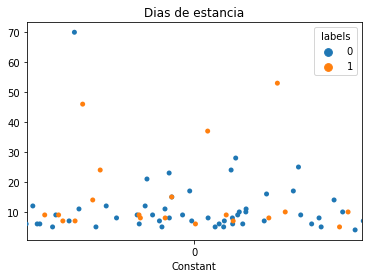

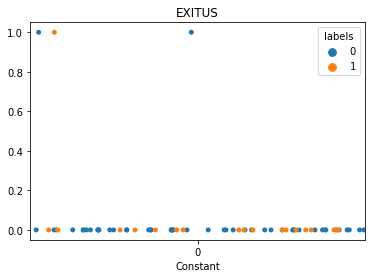

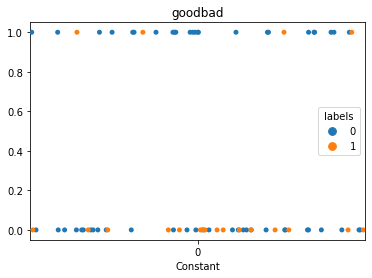

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

labeled_training['Constant'] = 0 #dummy feature for plotting

for i in range(26):
    col = labeled_training.columns[i]
    ax = sns.stripplot(x=labeled_training['Constant'], y=labeled_training[col].values,hue=labeled_training['labels'],dodge=True,jitter=1.5)
    ax.set_title(col)
    plt.show()

### 1.2 Clasificación 'goodbad'

In [19]:
for i in range(1): #comprobar que no hay NaN
    col = y_train_gb.columns[i]
    count = y_train_gb[col].isna().sum()
    print(y_train_gb[col].name,count)

goodbad 0


In [50]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

#### k-NN

In [24]:
import numpy as np

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, np.ravel(y_train_gb))

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train_gb)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test_gb)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.75


#### Logistic Regression

In [26]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train, np.ravel(y_train_gb))

print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(lr.score(X_train, y_train_gb)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(lr.score(X_test, y_test_gb)))

Accuracy of K-NN classifier on training set: 0.81
Accuracy of K-NN classifier on test set: 0.92


#### Comparación con varios modelos: 10-cross validation

In [56]:
# prepare models
models = []
models.append(('kNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('SGD', SGDClassifier(loss="hinge", penalty="l2", max_iter=100)))
models.append(('DTree', DecisionTreeClassifier(random_state=0)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=100)))
models.append(('LR', LogisticRegression(solver='lbfgs')))
models.append(('NN',MLPClassifier(random_state=1, max_iter=1000)))
models.append(('RF',RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)))
models.append(('ETC',ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)))
models.append(('GBC',GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)))

kNN: 0.649091 (0.123997)
SVM: 0.744545 (0.141506)
SGD: 0.656364 (0.173291)
DTree: 0.687273 (0.116150)
AdaBoost: 0.696364 (0.109560)
LR: 0.735455 (0.122808)
NN: 0.677273 (0.150824)
RF: 0.766364 (0.141132)
ETC: 0.756364 (0.120385)
GBC: 0.745455 (0.131426)


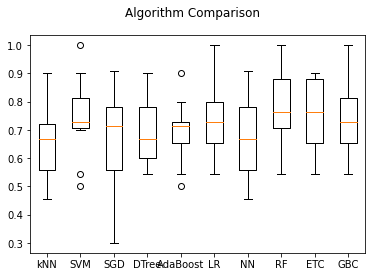

In [57]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train,np.ravel(y_train_gb), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Feature Selection

In [29]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot

In [30]:
# feature selection CHI2
def select_features(X_train, y_train_gb, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, np.ravel(y_train_gb))
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.030529
Feature 1: 0.005616
Feature 2: 0.012274
Feature 3: 0.350553
Feature 4: 0.032570
Feature 5: 0.142586
Feature 6: 1.016701
Feature 7: 0.020621
Feature 8: 0.011689
Feature 9: 0.021210
Feature 10: 0.329946
Feature 11: 8.567853
Feature 12: 6.121064
Feature 13: 1.209773
Feature 14: 0.016304
Feature 15: 4.846122
Feature 16: 5.342236
Feature 17: 1.783266
Feature 18: 9.207475
Feature 19: 5.115279
Feature 20: 0.013747


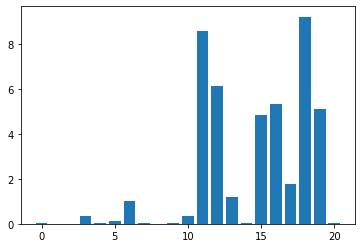

In [31]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, np.ravel(y_train_gb), X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Conocer el orden de las features, el número es el índice de la feature

In [32]:
np.argsort(fs.scores_)

array([ 1,  8,  2, 20, 14,  7,  9,  0,  4,  5, 10,  3,  6, 13, 17, 15, 19,
       16, 12, 11, 18], dtype=int64)

In [33]:
name_col_X=X_train.columns
print(name_col_X)

Index(['EDAD', 'SEXO', 'diabetes U', 'TABAQUISMO', 'ASA', 'vasculopatía U',
       'imc U', 'LEUCOCITOS', 'hemoglobina U', 'creatinina U',
       'neoadyuvancia U', 'LOCALIZACION', 'CIRUGIA', 'TiempoCx', 'Nº trocar',
       'conversion U', 'complicaciones intraop U', 'descenso ang U',
       'complicaciones U', 'trasfusion U', 'adyuvancia U'],
      dtype='object')


In [34]:
# feature selection MUTUAL INFO CLASSIF
def select_features(X_train, y_train_gb, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train_gb)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

Feature 0: 0.000000
Feature 1: 0.000000
Feature 2: 0.000000
Feature 3: 0.000000
Feature 4: 0.000000
Feature 5: 0.000000
Feature 6: 0.067228
Feature 7: 0.000000
Feature 8: 0.039478
Feature 9: 0.000000
Feature 10: 0.029482
Feature 11: 0.000000
Feature 12: 0.000000
Feature 13: 0.046828
Feature 14: 0.000000
Feature 15: 0.000000
Feature 16: 0.009782
Feature 17: 0.076770
Feature 18: 0.132871
Feature 19: 0.038421
Feature 20: 0.013049


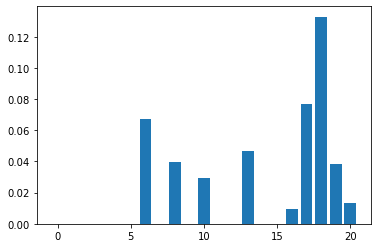

In [35]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, np.ravel(y_train_gb), X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [36]:
np.argsort(fs.scores_)

array([ 0,  1,  2,  3,  4,  5,  7, 15,  9, 14, 11, 12, 16, 20, 10, 19,  8,
       13,  6, 17, 18], dtype=int64)

#### Model built using all features

In [37]:
from sklearn.metrics import accuracy_score

Con todas las características se obtiene:

In [38]:
# fit the model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, np.ravel(y_train_gb))
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test_gb, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.67


In [58]:
# fit the model
model = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
model.fit(X_train, np.ravel(y_train_gb))
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test_gb, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 83.33


##### Select n-features

Cogemos las 5 características más relevantes de Chi2. De las 5 características sólo 1 es del preoperatorio:
1.- Complicaciones U
2.- Localización (PreOperatorio)
3.- Cirugía (\*)
4.- Comp. Intraop U
5.- Transfusión U

In [59]:
# feature selection
def select_features(X_train, y_train_gb, X_test):
    fs = SelectKBest(score_func=chi2, k=5)
    fs.fit(X_train, y_train_gb)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs

In [60]:
X_train_fs, X_test_fs = select_features(X_train, np.ravel(y_train_gb), X_test)

kNN: 0.745455 (0.145568)
SVM: 0.762727 (0.121319)
SGD: 0.676364 (0.142886)
DTree: 0.763636 (0.163990)
AdaBoost: 0.734545 (0.149755)
LR: 0.782727 (0.136996)
NN: 0.792727 (0.171998)
RF: 0.783636 (0.141234)
ETC: 0.773636 (0.150066)
GBC: 0.753636 (0.158320)


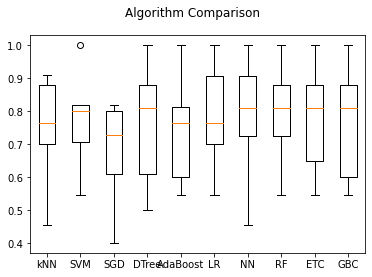

In [61]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_fs,np.ravel(y_train_gb), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Test con los mejores modelo: NN, RF, LR

In [69]:
# fit the model
modelNN = MLPClassifier(random_state=1, max_iter=1000)
modelNN.fit(X_train_fs, np.ravel(y_train_gb))
# evaluate the model
yhatNN = modelNN.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_gb, yhatNN)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.67


In [72]:
confusion_matrix(y_test_gb, yhatNN)

array([[5, 1],
       [0, 6]], dtype=int64)

In [68]:
# fit the model
modelRF = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
modelRF.fit(X_train_fs, np.ravel(y_train_gb))
# evaluate the model
yhatRF = modelRF.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test_gb, yhatRF)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 91.67


In [73]:
confusion_matrix(y_test_gb, yhatRF)

array([[5, 1],
       [0, 6]], dtype=int64)

Feature: 0, Score: 0.20663
Feature: 1, Score: 0.25562
Feature: 2, Score: 0.12866
Feature: 3, Score: 0.32467
Feature: 4, Score: 0.08441


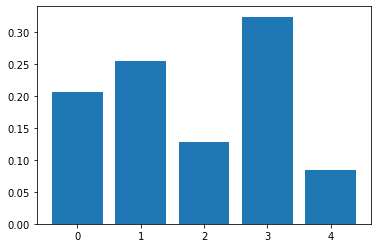

In [79]:
# get importance
importance = modelRF.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [71]:
# fit the model
modelLR = LogisticRegression(solver='lbfgs')
modelLR.fit(X_train_fs, np.ravel(y_train_gb))
# evaluate the model
yhatLR = modelLR.predict(X_test_fs)
# evaluate predictions
accuracyLR = accuracy_score(y_test_gb, yhatLR)
print('Accuracy: %.2f' % (accuracyLR*100))

Accuracy: 91.67


In [74]:
confusion_matrix(y_test_gb, yhatLR)

array([[5, 1],
       [0, 6]], dtype=int64)

Feature: 0, Score: -0.36999
Feature: 1, Score: 0.00659
Feature: 2, Score: -1.09059
Feature: 3, Score: -1.63766
Feature: 4, Score: -0.79699


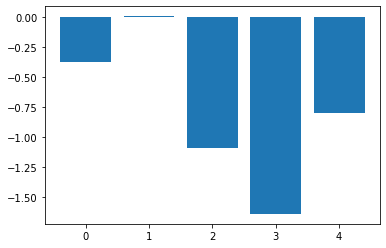

In [76]:
# get importance
importance = modelLR.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

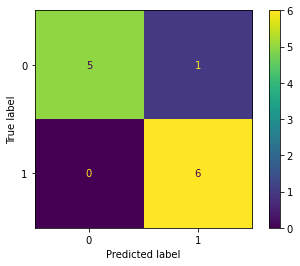

In [81]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(modelLR, X_test_fs, y_test_gb)  
plt.show()  